In [ ]:
#Importing necessary dependencies
import numpy as np
import pandas as pd
import sklearn.metrics
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from numpy import dstack
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading dataset
d1 = pd.read_csv('/content/drive/MyDrive/datsets/unsw_nb15/UNSW_NB15_training-set.csv')
t1 = pd.read_csv('/content/drive/MyDrive/datsets/unsw_nb15/UNSW_NB15_testing-set.csv')

In [ ]:
data = d1.append(t1)

In [ ]:
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
#Dropping attack category column since problem is binary classification
data.drop(columns = 'label', inplace = True)

In [ ]:
#Dropping NaN values
data.dropna(inplace = True)

In [ ]:
#Checking for null values in the dataset
data.isnull().sum().sum()

0

In [ ]:
data['service'].replace('-',np.nan,inplace=True)

In [ ]:
data.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(116352, 44)

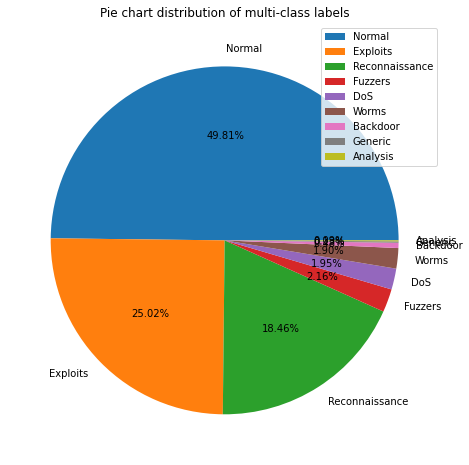

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

In [ ]:
label_feature = ['label']
categorical_features = ['proto', 'service', 'state']


In [ ]:
drop_features = ['id', 'sttl', 'dttl', 'swin', 'dwin', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']
numerical_features = list(set(data.columns) - set(label_feature) - set(categorical_features) - set(drop_features))

In [ ]:
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
serv = OneHotEncoder()
pro = OneHotEncoder()
sta = OneHotEncoder()

def encode(data):

    X = serv.fit_transform(data['service'].values.reshape(-1, 1))
    X2 = pro.fit_transform(data['proto'].values.reshape(-1, 1))
    X3 = sta.fit_transform(data['state'].values.reshape(-1, 1))

    data = pd.concat([data,
                      pd.DataFrame(X2.toarray(), columns=['proto_'+i for i in pro.categories_[0]]),
                      pd.DataFrame(X.toarray(), columns=['service_'+i for i in serv.categories_[0]]),
                      pd.DataFrame(X3.toarray(), columns=['state_'+i for i in sta.categories_[0]])],
                      axis=1)

    data.drop(['proto', 'service', 'state'], axis=1, inplace=True)

    return data

In [ ]:
data.reset_index(drop=True)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,36,1.639803e-02,tcp,http,FIN,0.000845,0.000726,0.000052,0.000080,0.000017,...,1,1,2,0,0,1,1,3,0,Normal
1,41,2.558777e-02,tcp,http,FIN,0.000845,0.000908,0.000053,0.000086,0.000012,...,1,1,2,0,0,1,1,3,0,Normal
2,46,1.765612e-02,tcp,http,FIN,0.000845,0.000726,0.000053,0.000077,0.000016,...,1,1,1,0,0,1,3,1,0,Normal
3,50,1.650926e-02,tcp,http,FIN,0.000845,0.000908,0.000051,0.000096,0.000019,...,1,1,2,0,0,1,1,2,0,Normal
4,73,2.172547e-02,tcp,http,FIN,0.001033,0.000726,0.000058,0.000076,0.000015,...,1,1,1,0,0,1,2,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,175336,1.000008e-07,udp,dns,INT,0.000094,0.000000,0.000003,0.000000,0.166667,...,33,17,45,0,0,0,33,45,0,Generic
116348,175337,1.500012e-07,udp,dns,INT,0.000094,0.000000,0.000003,0.000000,0.111111,...,24,13,24,0,0,0,24,24,0,Generic
116349,175339,1.500012e-07,udp,dns,INT,0.000094,0.000000,0.000003,0.000000,0.111111,...,3,3,13,0,0,0,3,12,0,Generic
116350,175340,1.500012e-07,udp,dns,INT,0.000094,0.000000,0.000003,0.000000,0.111111,...,30,14,30,0,0,0,30,30,0,Generic


In [ ]:
data.shape

(116352, 44)

In [ ]:
catval = ['proto', 'service', 'state']
data_cat = data[catval].copy()
data_cat.head()

,proto,service,state
35,tcp,http,FIN
40,tcp,http,FIN
45,tcp,http,FIN
49,tcp,http,FIN
72,tcp,http,FIN


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=catval)
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.drop(columns=catval,inplace=True)

In [ ]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [ ]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [ ]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [ ]:
multi_data.label

35        6
40        6
45        6
49        6
72        6
         ..
175335    5
175336    5
175338    5
175339    5
175340    5
Name: label, Length: 116352, dtype: int64

In [ ]:
X = data.drop(columns=['attack_cat'],axis=1)
Y = multi_data['label']

In [ ]:
Y.value_counts()

5    57956
6    29113
3    21480
2     2508
4     2266
7     2207
0      564
8      148
1      110
Name: label, dtype: int64

In [ ]:
data.attack_cat.value_counts()

Generic           57956
Normal            29113
Exploits          21480
DoS                2508
Fuzzers            2266
Reconnaissance     2207
Analysis            564
Worms               148
Backdoor            110
Name: attack_cat, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [ ]:
#ANOVA Feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=15)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
#Evaluation Metrics for the Multilayer Perceptrons
class FalsePositiveRate(tf.keras.metrics.Metric):
    def __init__(self, name='false_positive_rate', **kwargs):
        super(FalsePositiveRate, self).__init__(name=name, **kwargs)
        self.negatives = self.add_weight(name='negatives', initializer='zeros')
        self.false_positives = self.add_weight(name='false_negatives', initializer='zeros')
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        
        negatives = tf.reduce_sum(tf.cast(tf.equal(y_true, False), self.dtype))
        
        self.negatives.assign_add(negatives)
        
        y_pred = tf.greater_equal(y_pred, 0.5)
        
        false_positive_values = tf.logical_and(tf.equal(y_true, False), tf.equal(y_pred, True)) 
        false_positive_values = tf.cast(false_positive_values, self.dtype)
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, self.dtype)
            sample_weight = tf.broadcast_weights(sample_weight, values)
            values = tf.multiply(false_positive_values, sample_weight)
        
        false_positives = tf.reduce_sum(false_positive_values)
        
        self.false_positives.assign_add(false_positives)
        
    def result(self):
        return tf.divide(self.false_positives, self.negatives)

In [ ]:
#Evaluation Metrics for the Multilayer Perceptrons
def plot_loss(model_history):
  train_loss=[value for key, value in model_history.items() if 'loss' in key.lower()][0]
  valid_loss=[value for key, value in model_history.items() if 'loss' in key.lower()][1]
  fig, ax1 = plt.subplots()
  color = 'tab:blue'
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss', color=color)
  ax1.plot(train_loss, '--', color=color, label='Train Loss')
  ax1.plot(valid_loss, color=color, label='Valid Loss')
  ax1.tick_params(axis='y', labelcolor=color)
  plt.legend(loc='upper left')
  plt.title('Model Loss')
  plt.show()

In [ ]:
#Evaluation Metrics for the Multilayer Perceptrons
def plot_model_recall_fpr(model_history):
  train_recall=[value for key, value in model_history.items() if 'recall' in key.lower()][0]
  valid_recall=[value for key, value in model_history.items() if 'recall' in key.lower()][1]
  train_fpr=[value for key, value in model_history.items() if 'false_positive_rate' in key.lower()][0]
  valid_fpr=[value for key, value in model_history.items() if 'false_positive_rate' in key.lower()][1]
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Recall', color=color)
  ax1.set_ylim([-0.05,1.05])
  ax1.plot(train_recall, '--', color=color, label='Train Recall')
  ax1.plot(valid_recall, color=color, label='Valid Recall')
  ax1.tick_params(axis='y', labelcolor=color)
  plt.legend(loc='upper left')
  plt.title('Model Recall and FPR')
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
  color = 'tab:blue'
  ax2.set_ylabel('False Positive Rate', color=color)  # we already handled the x-label with ax1
  ax2.plot(train_fpr, '--', color=color, label='Train FPR')
  ax2.plot(valid_fpr, color=color, label='Valid FPR')
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.set_ylim([-0.05,1.05])
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.legend(loc='upper right')
  plt.show()

In [ ]:
#Evaluation Metrics for the Multilayer Perceptrons
def plot_train_history(history):
    # plot the cost and accuracy 
    loss_list = history['loss']
    val_loss_list = history['val_loss']
    accuracy_list = history['accuracy']
    val_accuracy_list = history['val_accuracy']
    # epochs = range(len(loss_list))

    # plot the cost
    plt.plot(loss_list, 'b', label='Training cost')
    plt.plot(val_loss_list, 'r', label='Validation cost')
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title('Training and validation cost')
    plt.legend()

    plt.figure()
    
    # plot the accuracy
    plt.plot(accuracy_list, 'b', label='Training accuracy')
    plt.plot(val_accuracy_list, 'r', label='Validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('iterations')
    plt.title('Training and validation accuracy')
    plt.legend()

In [ ]:
#Models being used as base learners
#Model1 - 
mlp = Sequential()
mlp.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dense(256, activation='relu'))
mlp.add(Dense(256, activation='relu'))
mlp.add(Dense(256, activation='relu'))
mlp.add(Dense(256, activation='relu'))
mlp.add(Dense(9, activation='softmax'))
mlp.summary()
mlp.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy', FalsePositiveRate(), tf.keras.metrics.Recall()]
           )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7808      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 240,521
Trainable params: 240,521
Non-trai

In [ ]:
#Model2 - 
mlp2 = Sequential()
mlp2.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
mlp2.add(Dense(256, activation='relu'))
mlp2.add(Dense(256, activation='relu'))
mlp2.add(Dense(256, activation='relu'))
mlp2.add(Dense(256, activation='relu'))
mlp2.add(Dense(9, activation='softmax'))
mlp2.summary()
mlp2.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy', FalsePositiveRate(), tf.keras.metrics.Recall()]
           )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               7808      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 9)                 2313      
                                                                 
Total params: 240,521
Trainable params: 240,521
Non-tr

In [ ]:
#Model3 - 
mlp3 = Sequential()
mlp3.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
mlp3.add(Dense(256, activation='relu'))
mlp3.add(Dense(256, activation='relu'))
mlp3.add(Dense(256, activation='relu'))
mlp3.add(Dense(256, activation='relu'))
mlp3.add(Dense(9, activation='softmax'))
mlp3.summary()
mlp3.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy', FalsePositiveRate(), tf.keras.metrics.Recall()]
           )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               7808      
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 9)                 2313      
                                                                 
Total params: 240,521
Trainable params: 240,521
Non-tr

In [ ]:
#Model4 - 
mlp4 = Sequential()
mlp4.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
mlp4.add(Dense(256, activation='relu'))
mlp4.add(Dense(256, activation='relu'))
mlp4.add(Dense(256, activation='relu'))
mlp4.add(Dense(9, activation='softmax'))
mlp4.summary()
mlp4.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy', FalsePositiveRate(), tf.keras.metrics.Recall()]
           )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               7808      
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 9)                 2313      
                                                                 
Total params: 174,729
Trainable params: 174,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
grid_parameters = [
    { #MLP
        'batch_size' : [1000, 500, 100],
        'epochs' : [80, 85, 90, 95, 100, 105, 110, 115, 120, 125],
        'validation_split' : [0.2],
        'verbose' : [0]
    },
    { #MLP2
        'batch_size' : [1000, 500, 100],
        'epochs' : [80, 85, 90, 95, 100, 105, 110, 115, 120, 125],
        'validation_split' : [0.2],
        'verbose' : [0]
    }, 
    { #MLP3
        'batch_size' : [1000, 500, 100],
        'epochs' : [80, 85, 90, 95, 100, 105, 110, 115, 120, 125],
        'validation_split' : [0.2],
        'verbose' : [0]
    },
    { #MLP3
        'batch_size' : [1000, 500, 100],
        'epochs' : [80, 85, 90, 95, 100, 105, 110, 115, 120, 125],
        'validation_split' : [0.2],
        'verbose' : [0]
    }
]

In [ ]:
y_train.dtypes
X_train.dtypes

id                     int64
dur                  float64
spkts                float64
dpkts                float64
sbytes               float64
dbytes               float64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                float64
dloss                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                float64
dtcpb                float64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                float64
dmean                float64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login  

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 9)
history = mlp.fit(x=X_train,y=y_train,batch_size=1000,epochs=85,validation_split = 0.2).history

h2 = mlp2.fit(x=X_train,
                  y=y_train,
                  batch_size=1000,
                  epochs=118,validation_split = 0.2,
                  verbose=0).history

h3 = mlp3.fit(x=X_train,
                  y=y_train,
                  batch_size=1000,
                  epochs=90,validation_split = 0.2,
                  verbose=0).history

h4 = mlp4.fit(x=X_train,
                  y=y_train,
                  batch_size=1000,
                  epochs=75,validation_split = 0.2,
                  verbose=0).history

Epoch 1/85
75/75 [==============================] - 4s 39ms/step - loss: 589.6962 - accuracy: 0.3822 - false_positive_rate: 0.0772 - recall: 0.3821 - val_loss: 62.8815 - val_accuracy: 0.1855 - val_false_positive_rate: 0.1016 - val_recall: 0.1848
Epoch 2/85
75/75 [==============================] - 3s 34ms/step - loss: 115.2685 - accuracy: 0.4162 - false_positive_rate: 0.0728 - recall: 0.4157 - val_loss: 37.6849 - val_accuracy: 0.6488 - val_false_positive_rate: 0.0437 - val_recall: 0.6488
Epoch 3/85
75/75 [==============================] - 3s 34ms/step - loss: 47.1582 - accuracy: 0.4544 - false_positive_rate: 0.0677 - recall: 0.4526 - val_loss: 25.3465 - val_accuracy: 0.2677 - val_false_positive_rate: 0.0884 - val_recall: 0.2216
Epoch 4/85
75/75 [==============================] - 3s 35ms/step - loss: 19.3940 - accuracy: 0.5193 - false_positive_rate: 0.0587 - recall: 0.5144 - val_loss: 11.6664 - val_accuracy: 0.5532 - val_false_positive_rate: 0.0480 - val_recall: 0.5506
Epoch 5/85
75/75 [

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test, 9)
test_results1 = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results1 -  Accuracy: {test_results1[1]*100}')
test_results2 = mlp2.evaluate(X_test, y_test, verbose=1)
print(f'Test results2 -  Accuracy: {test_results2[1]*100}')
test_results3 = mlp3.evaluate(X_test, y_test, verbose=1)
print(f'Test results3 -  Accuracy: {test_results3[1]*100}')
test_results4 = mlp4.evaluate(X_test, y_test, verbose=1)
print(f'Test results4 -  Accuracy: {test_results4[1]*100}')

728/728 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8902 - false_positive_rate: 0.0061 - recall: 0.8462
Test results1 -  Accuracy: 89.02496695518494
728/728 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8931 - false_positive_rate: 0.0076 - recall_1: 0.8568
Test results2 -  Accuracy: 89.31288123130798
728/728 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8933 - false_positive_rate: 0.0112 - recall_2: 0.8841
Test results3 -  Accuracy: 89.33006525039673
728/728 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8942 - false_positive_rate: 0.0104 - recall_3: 0.8775
Test results4 -  Accuracy: 89.42030668258667


MODEL - 1


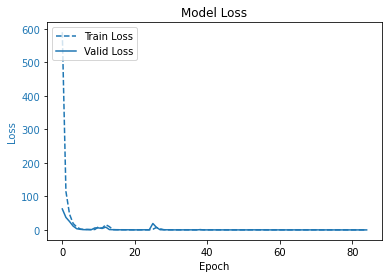

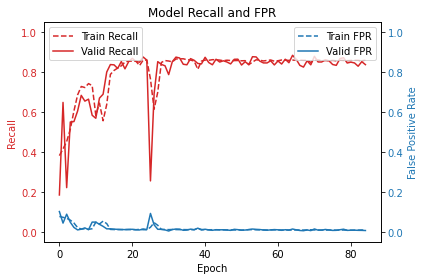

MODEL - 2


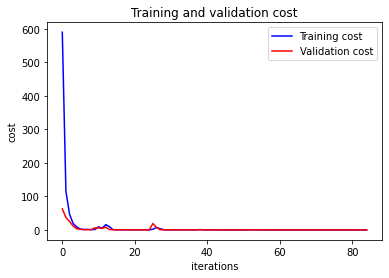

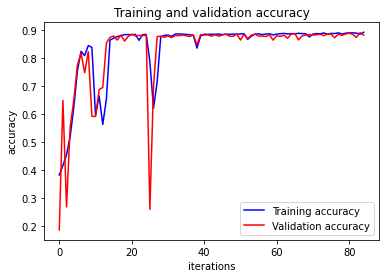

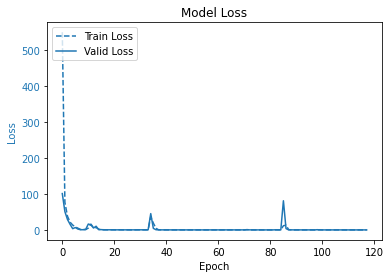

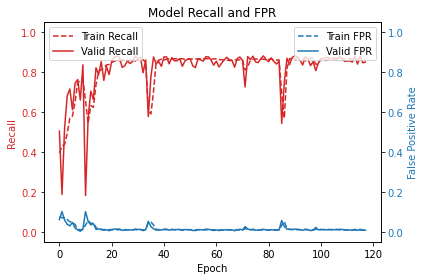

MODEL - 3


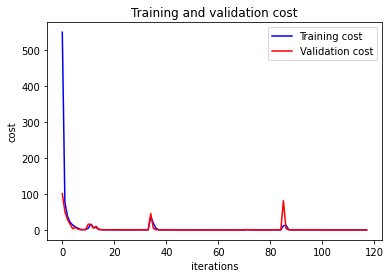

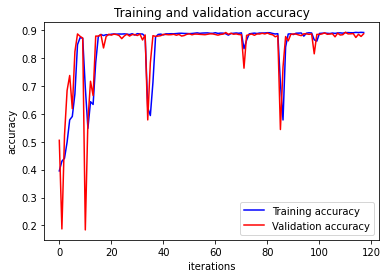

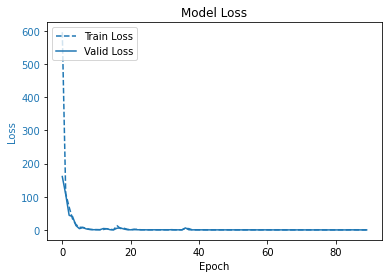

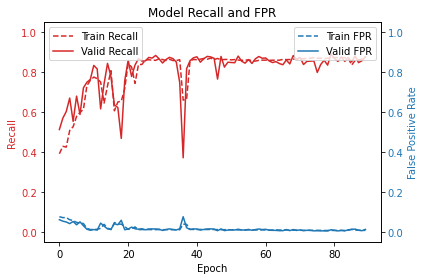

MODEL - 4


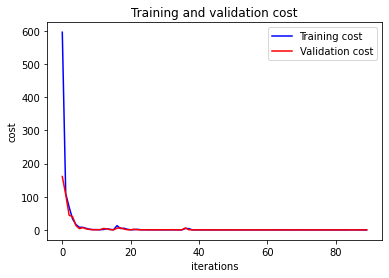

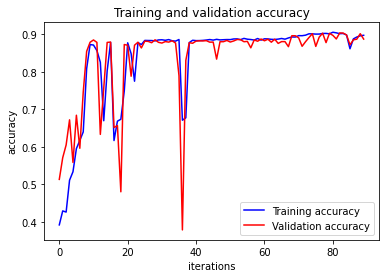

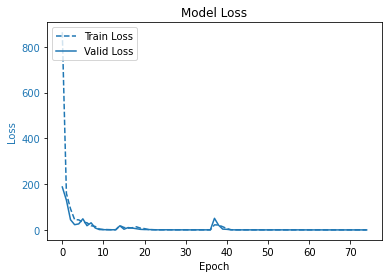

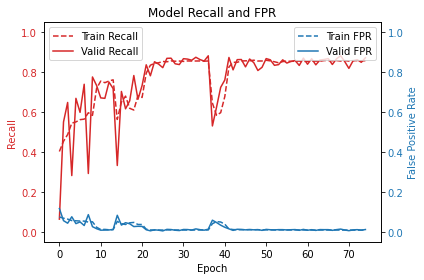

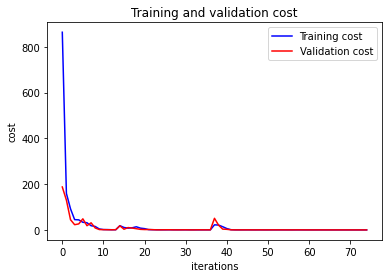

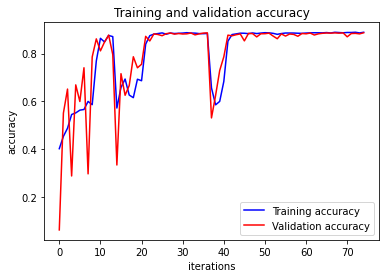

In [ ]:
#Graphs
print("MODEL - 1")
plot_loss(history)
plot_model_recall_fpr(history)
plot_train_history(history)
print("MODEL - 2")
plot_loss(h2)
plot_model_recall_fpr(h2)
plot_train_history(h2)
print("MODEL - 3")
plot_loss(h3)
plot_model_recall_fpr(h3)
plot_train_history(h3)
print("MODEL - 4")
plot_loss(h4)
plot_model_recall_fpr(h4)
plot_train_history(h4)

In [ ]:
mlp.save('model1.h5')

In [ ]:
mlp2.save('model2.h5')

In [ ]:
mlp3.save('model3.h5')

In [ ]:
mlp4.save('model4.h5')

In [ ]:
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# Specify the filename
		filename = '/content/model' + str(i + 1) + '.h5'
		# load the model 
		model = load_model(filename,custom_objects=dependencies)
		# Add a list of all the weaker learners
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [ ]:
dependencies = {'FalsePositiveRate': FalsePositiveRate}

n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded /content/model1.h5
>loaded /content/model2.h5
>loaded /content/model3.h5
>loaded /content/model4.h5
Loaded 4 models


In [ ]:
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat #
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

In [ ]:
y_test = y_test.reshape(-1)
y_test

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
# fit a model based on the outputs from the ensemble members
# 1 - Logistic Regression
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit the meta learner
	model = LogisticRegression() #meta learner
	model.fit(stackedX, inputy)
	return model
model = fit_stacked_model(members, X_test,y_test)

ValueError: ignored

In [ ]:
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat
# evaluate model on test set -
yhat = stacked_prediction(members, model, X_test)
score = accuracy_score(y_test/1.0, yhat/1.0)
print('Stacked Score with Logistic Regression:', score)

In [ ]:
# fit a model based on the outputs from the ensemble members
# 2 - Gradient Boosting Machine
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit the meta learner
	model = GradientBoostingClassifier() #meta learner
	model.fit(stackedX, inputy)
	return model
stackedmodel2 = fit_stacked_model(members, X_test,y_test)

In [ ]:
yhat2 = stacked_prediction(members, stackedmodel2, X_test)
score2 = accuracy_score(y_test/1.0, yhat2/1.0)
print('Stacked Score with Gradient Boosting Machine:', score2)